In [9]:
from typing import Union,List
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import keras_ocr
from skimage.transform import hough_line, hough_line_peaks
import os
import keras_ocr
import tensorflow as tf
import logging

%matplotlib inline
pipeline = keras_ocr.pipeline.Pipeline(scale=1)

Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5


In [10]:
# canny
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

In [25]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((3,3), np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    
    #img = cv2.erode(img, kernel, iterations=1)
    #img = cv2.dilate(img, kernel, iterations=1)
    #img = cv2.medianBlur(img, 5,0)
    img = cv2.GaussianBlur(img,(7,7),0)
    
    return img
    

In [12]:
def perp(a) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def seg_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = np.dot( dap, db)
    num = np.dot( dap, dp )
    return (num / denom.astype(float))*db + b1

In [21]:
# hough transform
from skimage.transform import hough_line, hough_line_peaks

def hough_print(h, theta, d, image, original):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(original, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()
    
    ax[1].imshow(image, cmap=plt.cm.gray)
    ax[1].set_ylim((image.shape[0], 0))
    ax[1].set_axis_off()
    ax[1].set_title('Detected lines')

    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        print(angle)
        (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
        ax[1].axline((x0, y0), slope=np.tan(angle + np.pi/2), color = 'r', linewidth = 3)

    plt.tight_layout()
    plt.show()

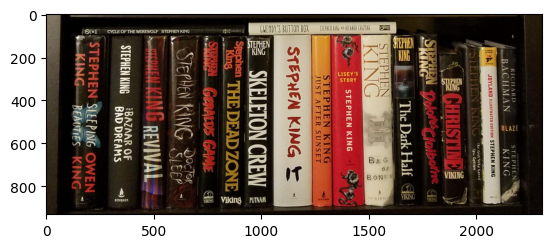

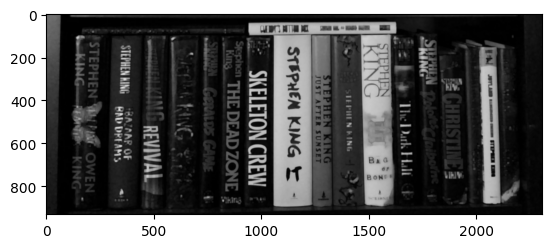

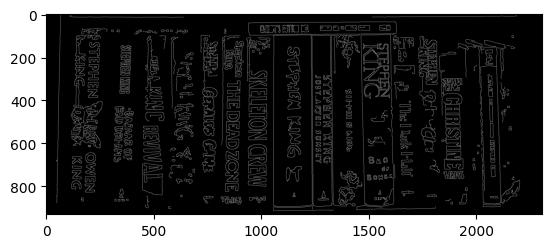

C:\Users\User\AppData\Local\Temp\ipykernel_18636\2680772039.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  y0 = dist2 / np.sin(angle2)
C:\Users\User\AppData\Local\Temp\ipykernel_18636\2680772039.py:34: RuntimeWarning: divide by zero encountered in double_scalars
  y1 = (dist2 - col2 * np.cos(angle2)) / np.sin(angle2)


0.0
-0.013962634015954656
-0.0279252680319092
-0.013962634015954656
-0.0279252680319092
-0.0279252680319092
-0.013962634015954656
-0.013962634015954656
0.013962634015954656


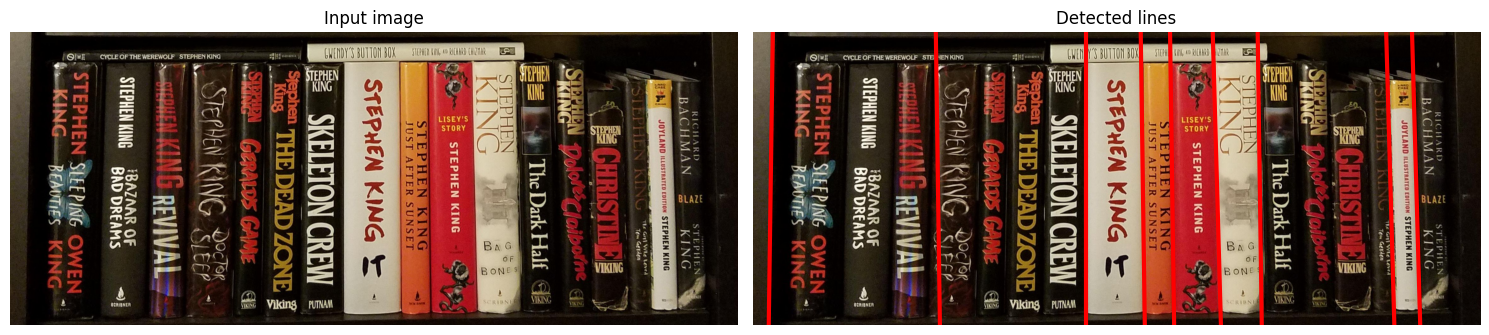

In [26]:
#load
path = "./8ylmg890d3b512.jpg"
#path = "../images_sel/book1.jpg"
img2 = cv2.imread(path)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
original = img2.copy()
plt.imshow(original)
plt.show()
    
#preprocess
img2 = preprocess(img2)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

#canny
edges = auto_canny(img2, sigma = 2.0) 

plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()

#hough
tested_angles = np.linspace(-np.pi / 5, np.pi / 5, 90, endpoint=False)
h, theta, d = hough_line(edges, theta=tested_angles)

img2 = original

row2, col2, _ = img2.shape
line_list = []
for _, angle2, dist2 in zip(*hough_line_peaks(h, theta, d)):
    y0 = dist2 / np.sin(angle2)
    y1 = (dist2 - col2 * np.cos(angle2)) / np.sin(angle2)
    #if (y0 != float('inf') and y1 != float('inf')):
    #    print(str(y0) + " "+ str(y1))
    line_list.append((y0, y1))
hough_print(h, theta, d, img2.copy(), original.copy())

2308 930
index - 0
nan nan - 64.00623907156421 31.7783854068529
nan
index - 1
64.00623907156421 31.7783854068529 - 2091.815567428093 2156.2838448138164
2027.8093283565286
index - 2
2091.815567428093 2156.2838448138164 - 2009.7835843916969 2074.2518617774203
82.03198303639601
1/1 [==============================] - 1s 566ms/step
[[('king', array([[698.9196  ,  64.230934],
       [761.78973 ,  61.373203],
       [762.998   ,  87.95464 ],
       [700.12787 ,  90.81238 ]], dtype=float32)), ('stephen', array([[583.34686 ,  66.52956 ],
       [695.9395  ,  63.642567],
       [696.6833  ,  92.64914 ],
       [584.09064 ,  95.53613 ]], dtype=float32)), ('edition', array([[506.,  72.],
       [578.,  72.],
       [578.,  92.],
       [506.,  92.]], dtype=float32)), ('illustaated', array([[391.49658,  75.89074],
       [505.8849 ,  72.31611],
       [506.53857,  93.23318],
       [392.15027,  96.80781]], dtype=float32)), ('joyland', array([[278.,  76.],
       [390.,  76.],
       [390., 104.],
 

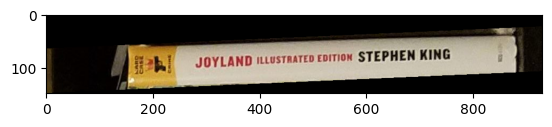

index - 3
2009.7835843916969 2074.2518617774203 - 1459.5690640256275 1524.0373414113512
550.2145203660693
1/1 [==============================] - 2s 2s/step
[[('king', array([[432.55295 ,  52.548866],
       [571.46436 ,  46.879005],
       [573.4785  ,  96.225365],
       [434.56714 , 101.895226]], dtype=float32)), ('wie', array([[674.,  50.],
       [720.,  50.],
       [720.,  68.],
       [674.,  68.]], dtype=float32)), ('vonse', array([[721.38525,  54.16342],
       [773.93005,  50.87938],
       [774.8795 ,  66.07004],
       [722.3347 ,  69.35408]], dtype=float32)), ('gil', array([[632.,  52.],
       [672.,  52.],
       [672.,  70.],
       [632.,  70.]], dtype=float32)), ('de', array([[600.,  56.],
       [630.,  56.],
       [630.,  70.],
       [600.,  70.]], dtype=float32)), ('stephen', array([[174.78175 ,  58.171402],
       [417.56604 ,  51.10002 ],
       [419.0426  , 101.794876],
       [176.2583  , 108.86626 ]], dtype=float32)), ('geren', array([[664.,  70.],
       [7

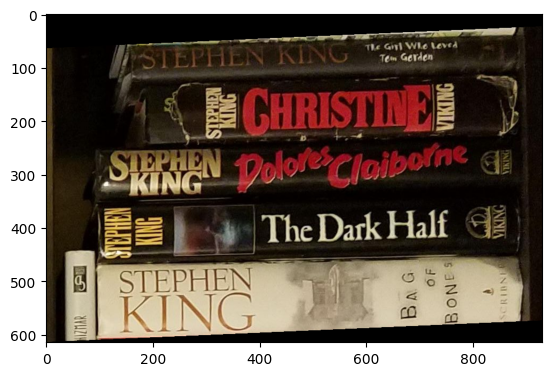

index - 4
1459.5690640256275 1524.0373414113512 - 1602.1561717600912 1634.3840254248028
142.58710773446364
1/1 [==============================] - 1s 835ms/step
[[('d', array([[748.,  26.],
       [766.,  26.],
       [766.,  40.],
       [748.,  40.]], dtype=float32)), ('n', array([[712.,  36.],
       [732.,  36.],
       [732.,  54.],
       [712.,  54.]], dtype=float32)), ('stephen', array([[132.83119 ,  39.42936 ],
       [391.56326 ,  31.589   ],
       [393.18713 ,  85.176155],
       [134.45505 ,  93.01651 ]], dtype=float32)), ('g', array([[668.,  42.],
       [696.,  42.],
       [696.,  68.],
       [668.,  68.]], dtype=float32)), ('z', array([[748.,  44.],
       [776.,  44.],
       [776., 116.],
       [748., 116.]], dtype=float32)), ('o', array([[712.,  50.],
       [732.,  50.],
       [732.,  72.],
       [712.,  72.]], dtype=float32)), ('co', array([[666.3503 ,  76.39689],
       [701.33856,  78.58365],
       [697.5175 , 139.71985],
       [662.52924, 137.53308]], dtyp

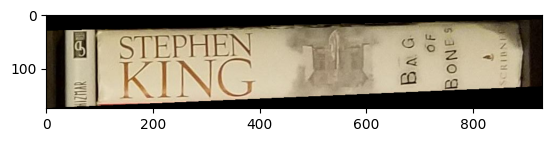

index - 5
1602.1561717600912 1634.3840254248028 - 1324.1290707929843 1356.3569244576956
278.0271009671069
1/1 [==============================] - 1s 1s/step
[[('d', array([[748.,  26.],
       [766.,  26.],
       [766.,  40.],
       [748.,  40.]], dtype=float32)), ('stephen', array([[132.87634 ,  38.29595 ],
       [391.57477 ,  30.974298],
       [393.06183 ,  83.51711 ],
       [134.3634  ,  90.83877 ]], dtype=float32)), ('o', array([[712.,  36.],
       [734.,  36.],
       [734.,  72.],
       [712.,  72.]], dtype=float32)), ('z', array([[748.,  38.],
       [776.,  38.],
       [776., 116.],
       [748., 116.]], dtype=float32)), ('g', array([[668.,  42.],
       [696.,  42.],
       [696.,  68.],
       [668.,  68.]], dtype=float32)), ('co', array([[666.3658 ,  76.14786],
       [701.22955,  78.32684],
       [697.5097 , 137.84436],
       [662.64594, 135.66537]], dtype=float32)), ('king', array([[136.34723 ,  88.762985],
       [393.30566 ,  80.47401 ],
       [395.8545  , 159.

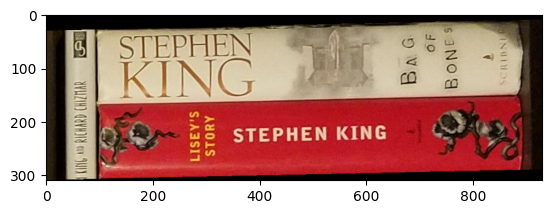

index - 6
1324.1290707929843 1356.3569244576956 - 1231.1200046421177 1263.3478583068288
93.0090661508666
1/1 [==============================] - 0s 414ms/step
[[('king', array([[553.5509  ,  32.19714 ],
       [697.8014  ,  29.475452],
       [698.5515  ,  69.23488 ],
       [554.301   ,  71.95657 ]], dtype=float32)), ('stephen', array([[282.,  32.],
       [530.,  32.],
       [530.,  72.],
       [282.,  72.]], dtype=float32)), ('just', array([[282.,  76.],
       [380.,  76.],
       [380., 108.],
       [282., 108.]], dtype=float32)), ('after', array([[398.,  76.],
       [524.,  76.],
       [524., 106.],
       [398., 106.]], dtype=float32)), ('sunset', array([[540.,  76.],
       [698.,  76.],
       [698., 106.],
       [540., 106.]], dtype=float32))]]


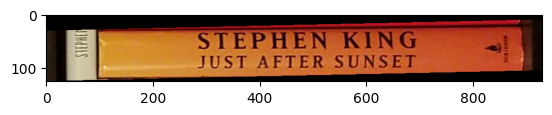

index - 7
1231.1200046421177 1263.3478583068288 - 581.0566390715437 613.2844927362551
650.063365570574
1/1 [==============================] - 2s 2s/step
[[('s', array([[46., 36.],
       [84., 36.],
       [84., 80.],
       [46., 80.]], dtype=float32)), ('e', array([[704.,  70.],
       [780.,  70.],
       [780., 148.],
       [704., 148.]], dtype=float32)), ('stephen', array([[148.94574 ,  77.17413 ],
       [449.4884  ,  71.394455],
       [450.94867 , 147.32791 ],
       [150.406   , 153.10759 ]], dtype=float32)), ('king', array([[474.,  72.],
       [674.,  72.],
       [674., 146.],
       [474., 146.]], dtype=float32)), ('e', array([[ 50.,  82.],
       [ 88.,  82.],
       [ 88., 168.],
       [ 50., 168.]], dtype=float32)), ('s', array([[ 46.86948 , 166.43231 ],
       [ 87.864586, 165.26102 ],
       [ 90.90375 , 271.63132 ],
       [ 49.908638, 272.8026  ]], dtype=float32)), ('e', array([[122., 220.],
       [158., 220.],
       [158., 330.],
       [122., 330.]], dtype=flo

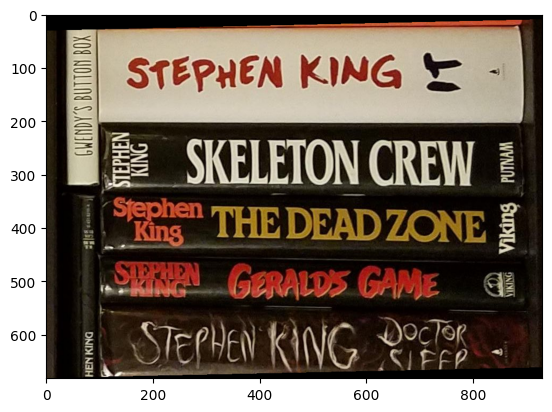

In [28]:

import pytesseract
#sort line list in order of books in shelf
line_list = sorted(line_list, key=lambda x: x[1])

#os.chdir('./filteredbooks_CV/')
print(f'{col2} {row2}')
# iterate through lines, and slice individual books 
#col, row = 0,0
index = 0
for index in range(len(line_list)-1):
    print("index - " + str(index))
    # define points for first line
    y0_0, y1_0 = line_list[index]
    p1_0, p2_0 = np.array([0, y0_0]), np.array([col2, y1_0])
    
    p3_top, p4_top = np.array( [0,0] ), np.array( [row2,0] )
    p3_bottom, p4_bottom = np.array( [0,col2] ), np.array( [row2,col2] )
    
    # find intersection points of the first line with the image
    top_0 = (seg_intersect( p1_0,p2_0, p3_top,p4_top)[0])
    bottom_0 = (seg_intersect( p1_0,p2_0, p3_bottom,p4_bottom)[0])
    
    # define points for second line
    y0_1, y1_1 = line_list[index+1]
    p1_1, p2_1 = np.array( [0, y0_1] ), np.array( [col2, y1_1] )

    # find intersection points of the second line with the image
    top_1 = (seg_intersect( p1_1,p2_1, p3_top,p4_top)[0])
    bottom_1 = (seg_intersect( p1_1,p2_1, p3_bottom,p4_bottom)[0])
    
    print(f'{top_0} {bottom_0} - {top_1} {bottom_1}')
    
    print(abs(top_1-top_0))
    if abs(top_1-top_0) < 1000:
        #define mask of image
        mask = np.zeros(img2.shape, dtype=np.uint8)
        #corners to slice 
        roi_corners = np.array([[top_0, 0.0],[bottom_0,1486],[bottom_1,1486],[top_1 , 0.0]], dtype=np.int32)

        # fill ROI 
        channel_count =  1 if (len(img2.shape) == 2) else img2.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,)*channel_count
        cv2.fillConvexPoly(mask, roi_corners, ignore_mask_color)
        
        # apply the mask
        masked_image = cv2.bitwise_and(img2, mask)
        
        plt.imshow(masked_image)
        minval = int(np.min([top_0, bottom_0, bottom_1, top_1]))
        maxval = int(np.max([top_0, bottom_0, bottom_1, top_1]))
        if (minval<0):
            minval=0
        rotated = rotated = np.rot90(masked_image[:, minval:maxval])
        #dst = cv2.fastNlMeansDenoisingColored(rotated, None, 10, 10, 7, 15) 

        #gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
        
        #imgf = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) #imgf contains Binary image
        
        
        prediction = pipeline.recognize([rotated])
        
        print(prediction)
        plt.imshow(rotated)
        plt.show()
        
        #save image to use later
        cv2.imwrite(f'{index}.jpg', cv2.cvtColor(rotated, cv2.COLOR_RGB2BGR))
        



In [ ]:
#for safelity
img2 = original.copy()

row2, col2, _ = img2.shape

#get info about line
line_list = []
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    #print(f'{x0} : {y0}')
    line_list.append([int(x0), y0, np.tan(angle + np.pi/2)])
    
    
#sort lines so they will be in order of bookshelf
line_list = sorted(line_list, key=lambda x: x[0])
#print(line_list)


#y0 - lowest line of image, y1 - height
y0, y1 = 0, img2.shape[1]

#start slicing
for i in range(len(line_list)-1):
    #x_1 is lowest x
    #coord of first line
    x0_1 = line_list[i][0]
    slope0 = line_list[i][2]
    #x0_2 = abs(int((y1 - slope0*x0_1)/slope0))
    x0_2 = abs(int((-y1 + slope0*x0_1)/slope0))
    
    #coord of second line
    x1_1 = line_list[i+1][0]
    slope1 = line_list[i+1][2]
    x1_2 = abs(int((y1 - slope1*x1_1)/slope1))
    #x1_2 = abs(int((-y1 + slope1*x1_1)/slope1))
    
    print(f'{x0_1}:{x0_2} {x1_1}:{x1_2}')
    print(f'[{x0_1}:{y0}] {x0_2}:{y1} [{x1_1}:{y0}] {x1_2}:{y1}')
    
    #define mask of image
    mask = np.zeros(img2.shape, dtype=np.uint8)
    #corners to slice 
    #roi_corners = np.array([[x0_1, y0], [x0_2, y1], [x1_2, y1],[x1_1, y0]], dtype=np.int32)
    roi_corners = np.array([[x0_1, y1], [x0_2, y0], [x1_2, y0],[x1_1, y1]], dtype=np.int32)

    # fill ROI 
    pts = roi_corners.reshape((-1,1,2))
    cv2.fillPoly(mask, np.array([pts]), (0,255,255))
    
    plt.imshow(mask)
    plt.show()
    # apply the mask
    masked_image = cv2.bitwise_and(img2, mask)
        
    #get coord
    min_x = np.min([x0_1, x0_2, x1_1, x1_2])
    max_x = np.max([x0_1, x0_2, x1_1, x1_2])
    #print(f'{min_x} {max_x}')
    rotated = masked_image[:,min_x:max_x:]
    rotated = rotated = np.rot90(rotated)
    prediction = pipeline.recognize([rotated])
    print(prediction)
    
    plt.figure()
    fig, axes = plt.subplots(1,3, figsize = (15,5))
    axes.flat[0].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    axes.flat[0].set_title("mask", fontsize=16)
    
    axes.flat[1].imshow(rotated)#cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    axes.flat[1].set_title("crop", fontsize=16)
    
    axes.flat[2].imshow(img2)#cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes.flat[2].set_title("orig", fontsize=16)
    plt.show()
    

    
#hough_print(h, theta, d, img2.copy(), original.copy())